# PPGCOMP - FURG | 23148P - Data Visualization and Exploratory Data Analysis | 02/2024 
This notebook contains the solution for Task 09 of the course 23148P - Data Visualization and Exploratory Data Analysis - 02/2024 of the Graduate Program in Computing at FURG (PPGCOMP-FURG).

**Professor:** Dr. Adriano Velasque Werhli.

**Student:** Vitor Avelaneda.

* **Contact:** avelaneda.vitor@gmail.com

The repository with the notebooks can be accessed [here!](https://github.com/vitoravelaneda/23148P-Data_Visualization_and_Exploratory_Data_Analysis-PPGCOMP-FURG)

## Task:
- Exploring Universal CNPQ 2023

- Using the data set provided, produce graph(s) that explore and unveil how the distribution of Edital Universal resources work. The code for different CNPQ knowledge areas is listed below.

- You should hand the figures and the code you used to produce the figures.

- You will present your graph and analysis for your colleagues.

## Solution:

**Verify the installation of necessary packages.**

In [1]:
if (!requireNamespace("geobr", quietly = TRUE)) install.packages("geobr")
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")
if (!requireNamespace("readr", quietly = TRUE)) install.packages("readr")
if (!requireNamespace("sf", quietly = TRUE)) install.packages("sf")
if (!requireNamespace("viridis", quietly = TRUE)) install.packages("viridis")
if (!requireNamespace("scales", quietly = TRUE)) install.packages("scales")

Carregando namespace exigido: sf



**Load necessary packages.**

In [2]:
library(geobr)
library(ggplot2)
library(dplyr)
library(readr)
library(sf)
library(viridis)
library(scales)


Anexando pacote: ‘dplyr’


Os seguintes objetos são mascarados por ‘package:stats’:

    filter, lag


Os seguintes objetos são mascarados por ‘package:base’:

    intersect, setdiff, setequal, union


Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE

Carregando pacotes exigidos: viridisLite


Anexando pacote: ‘scales’


O seguinte objeto é mascarado por ‘package:viridis’:

    viridis_pal


O seguinte objeto é mascarado por ‘package:readr’:

    col_factor




**Read the CSV file**:

In [3]:
data <- read.csv("Universal2023_prelim.csv")
View(data)

Faixa,CA,Processo,Coordenador,Instituição,UF,Região,Recomendação.CA,Aprovação,Custeio.Aprov,Capital.Aprov,Bolsas.Aprov,Total.Aprovado
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
Faixa A,AC,408489/2023-5,Lidia Eugenia Cavalcante,UFC,CE,NE,Recomendada,Aprovada,28639,14000,0,42639
Faixa A,AC,406729/2023-9,Carolina Ferreira da Fonseca,UFPB,PB,NE,Recomendada,Aprovada,42000,0,0,42000
Faixa A,AC,408840/2023-4,Ana Carolina Nunes do Couto,UFPE,PE,NE,Recomendada,Aprovada,0,20000,0,20000
Faixa A,AC,402272/2023-4,Alessandra Souza Melett Brum,UFJF,MG,SE,Recomendada,Aprovada,9760,25000,0,34760
Faixa A,AC,407697/2023-3,Beatriz Brandao Polivanov,UFF,RJ,SE,Recomendada,Aprovada,30000,15300,0,45300
Faixa A,AC,421556/2023-4,Juliano Mauricio de Carvalho,UNESP,SP,SE,Recomendada,Aprovada,21480,0,28020,49500
Faixa A,AC,408708/2023-9,Marcia Cristina Pascotto,UFMT,MT,CO,Recomendada,Aprovada,5177,5000,8580,18757
Faixa A,AC,407164/2023-5,Fabiano Couto Correa da Silva,UFRGS,RS,SU,Recomendada,Aprovada,16000,6000,23300,45300
Faixa A,AC,406531/2023-4,Juliano Jose de Araujo,UNIR,RO,NO,Recomendada,Aprovada,49500,0,0,49500


**Create a data frame with the codes and areas**:

In [4]:
areas <- data.frame(
  Código = c("AC", "AE", "AG", "AL", "AQ", "BF", "BI", "BO", "CA", "CC", "CS", "DC", "DI", "EA", 
             "EC", "ED", "EE", "EF", "EL", "EM", "EN", "EP", "EQ", "FA", "FI", "FR", "GC", "GE", 
             "HI", "IM", "LL", "MA", "MD", "ME", "MF", "MM", "MP", "MS", "OC", "OD", "PS", "QU", 
             "RF", "SA", "SN", "VT", "ZO", "ZT"),
  Área = c(
    "Artes Ciência da Informação e Comunicação",
    "Administração Contabilidade e Economia",
    "Agronomia",
    "Ciência e Tecnologia de Alimentos",
    "Aquicultura e Recursos Pesqueiros",
    "Biofísica Bioquímica Farmacologia Fisiologia e Neurociências",
    "Biotecnologia",
    "Botânica",
    "Engenharia e Ciências Ambientais",
    "Ciência da Computação",
    "Antropologia Arqueologia Ciência Política Direito Relações Internacionais e Sociologia",
    "Divulgação Científica",
    "Design",
    "Engenharia Agrícola",
    "Engenharia Civil",
    "Educação",
    "Engenharias Elétrica e Biomédica",
    "Enfermagem",
    "Ecologia e Limnologia",
    "Engenharia Mecânica Naval e Oceânica e Aeroespacial",
    "Engenharia Nuclear Energia Renovável e Planejamento Energético",
    "Engenharias de Transportes e de Produção",
    "Engenharia Química",
    "Física e Astronomia",
    "Filosofia",
    "Farmácia",
    "Geociências",
    "Genética",
    "História",
    "Imunologia",
    "Letras e Linguística",
    "Matemática e Estatística",
    "Medicina",
    "Microeletrônica",
    "Morfologia",
    "Engenharias de Minas Metalurgia e Materiais",
    "Microbiologia e Parasitologia",
    "Educação Física Fonoaudiologia Fisioterapia e Terapia Ocupacional",
    "Oceanografia",
    "Odontologia",
    "Psicologia e Serviço Social",
    "Química",
    "Recursos Florestais",
    "Arquitetura Demografia Geografia Turismo e Planejamento Urbano e Regional",
    "Saúde Coletiva e Nutrição",
    "Medicina Veterinária",
    "Zoologia",
    "Zootecnia"
  )
)


**Create map with number of requesting institutions by state**: [PDF Here!](./mapa_instituicoes_por_uf.pdf)

Using year/date 2020



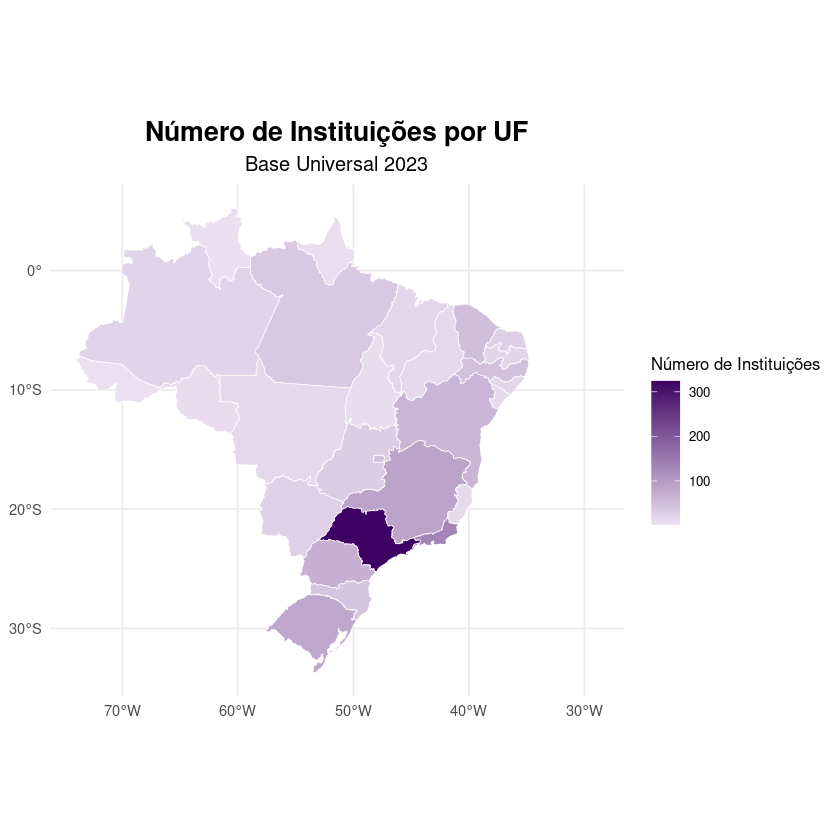

In [5]:
instituicoes_por_uf <- data %>%
  filter(!is.na(UF)) %>% 
  group_by(UF) %>%
  summarise(num_instituicoes = n_distinct(Instituição))

ufs <- read_state(year = 2020) 

mapa_data <- ufs %>%
  left_join(instituicoes_por_uf, by = c("abbrev_state" = "UF"))

p <- ggplot(mapa_data) +
  geom_sf(aes(fill = num_instituicoes), color = "white", size = 0.2) + 
  scale_fill_gradient(low = "#ebe0f1", high = "#3d0063", na.value = "grey90", 
                      name = "Número de Instituições") +
  labs(
    title = "Número de Instituições por UF",
    subtitle = "Base Universal 2023",
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 12),
    legend.title = element_text(size = 10),
    legend.text = element_text(size = 8)
  )

ggsave("mapa_instituicoes_por_uf.pdf", plot = p, width = 12, height = 8)

print(p)


**Create map with the Total Approved Resources by State**: [PDF Here!](./Mapa_recursos_Total_Aprovado.pdf)

Using year/date 2020



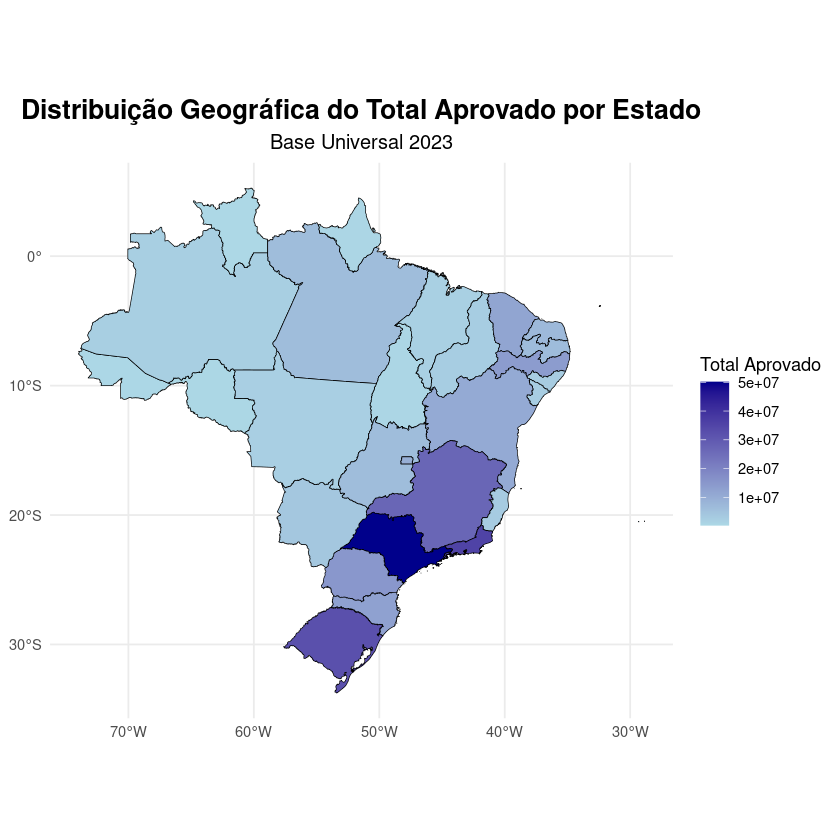

In [6]:
data_aggregated <- data %>%
  group_by(UF) %>%
  summarize(Total_Aprovado = sum(Total.Aprovado, na.rm = TRUE))

br_map <- geobr::read_state(year = 2020)

map_data <- br_map %>%
  left_join(data_aggregated, by = c("abbrev_state" = "UF"))

p_map <- ggplot(map_data) +
  geom_sf(aes(fill = Total_Aprovado), color = "black", size = 0.2) +
  scale_fill_gradient(
    low = "lightblue",
    high = "darkblue",
    name = "Total Aprovado",
    na.value = "grey80"
  ) +
  theme_minimal() +
  labs(
    title = "Distribuição Geográfica do Total Aprovado por Estado",
    subtitle = "Base Universal 2023",
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 12),
    legend.position = "right"
  )

ggsave("Mapa_recursos_Total_Aprovado.pdf", plot = p_map, width = 16, height = 8)

print(p_map)


**Create a graph with the percentage of resources of the top 15 institutions in RS**: [PDF Here!](./percentual_top_15_instituicoes_rs.pdf)

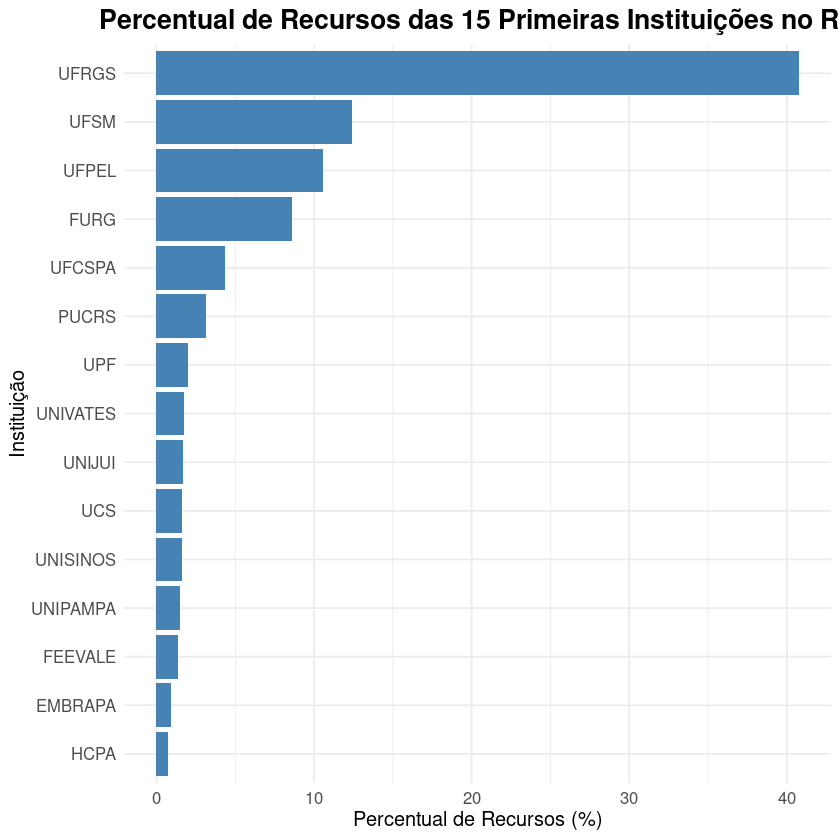

In [7]:
recursos_rs <- data %>%
  filter(UF == "RS", !is.na(Total.Aprovado)) %>%  
  group_by(Instituição) %>%
  summarise(total_recursos = sum(Total.Aprovado, na.rm = TRUE)) %>%  
  filter(total_recursos > 0) %>%  
  arrange(desc(total_recursos))  

total_recursos_rs <- sum(recursos_rs$total_recursos)

top_15 <- recursos_rs %>%
  top_n(15, total_recursos)

total_top_15 <- sum(top_15$total_recursos)

percentual_top_15 <- (total_top_15 / total_recursos_rs) * 100

top_15 <- top_15 %>%
  mutate(percentual = (total_recursos / total_recursos_rs) * 100)

p <- ggplot(top_15, aes(x = reorder(Instituição, percentual), y = percentual)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() + 
  labs(
    title = "Percentual de Recursos das 15 Primeiras Instituições no RS",
    x = "Instituição",
    y = "Percentual de Recursos (%)",
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 10)
  )

ggsave("percentual_top_15_instituicoes_rs.pdf", plot = p, width = 10, height = 8)

print(p)


**Create a graph of resources allocated to FURG by evaluation area**: [PDF Here!](./grafico_furg_Total_recursos.pdf)

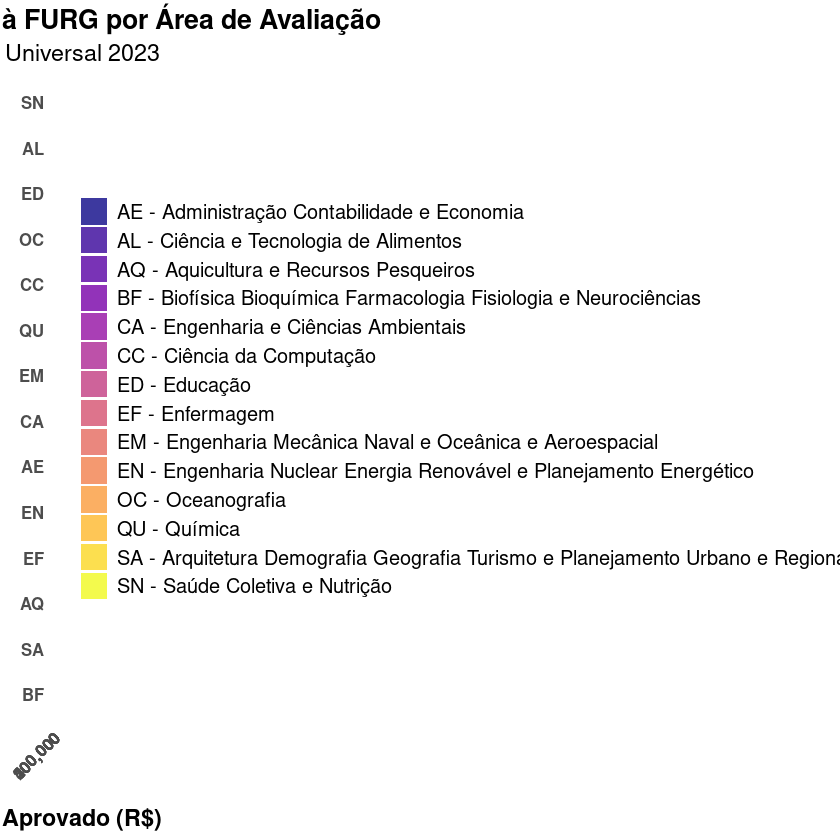

In [8]:
furg_data <- data %>%
  filter(Instituição == "FURG") %>%
  filter(!is.na(Total.Aprovado) & Total.Aprovado > 0)

furg_data <- furg_data %>%
  left_join(areas, by = c("CA" = "Código"))

furg_data$CA_Area <- paste(furg_data$CA, "-", furg_data$Área)

p <- ggplot(furg_data, aes(x = reorder(CA, Total.Aprovado, sum), y = Total.Aprovado, fill = CA_Area)) +
  geom_bar(stat = "identity", show.legend = TRUE, alpha = 0.8) +
  scale_y_continuous(labels = scales::comma) +  
  scale_fill_viridis(option = "plasma", discrete = TRUE) +  
  coord_flip() +  
  theme_minimal() +
  labs(
    title = "Recursos Destinados à FURG por Área de Avaliação",
    subtitle = "Base Universal 2023",
    x = "Área de Avaliação (CA)",
    y = "Total Aprovado (R$)"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 14),
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold", size = 10),
    axis.text.y = element_text(, hjust = 1, face = "bold", size = 10),
    axis.title.x = element_text(size = 14, face = "bold", margin = margin(t = 15)),
    axis.title.y = element_text(size = 14, face = "bold", margin = margin(r = 15)),
    legend.title = element_blank(),  
    legend.text = element_text(size = 12)  
  )

ggsave("grafico_furg_Total_recursos.pdf", plot = p, width = 16, height = 8)

print(p)


**Create a graph of approved scholarships at FURG by evaluation area**: [PDF Here!](./grafico_furg_Bolsas_Aprov.pdf)

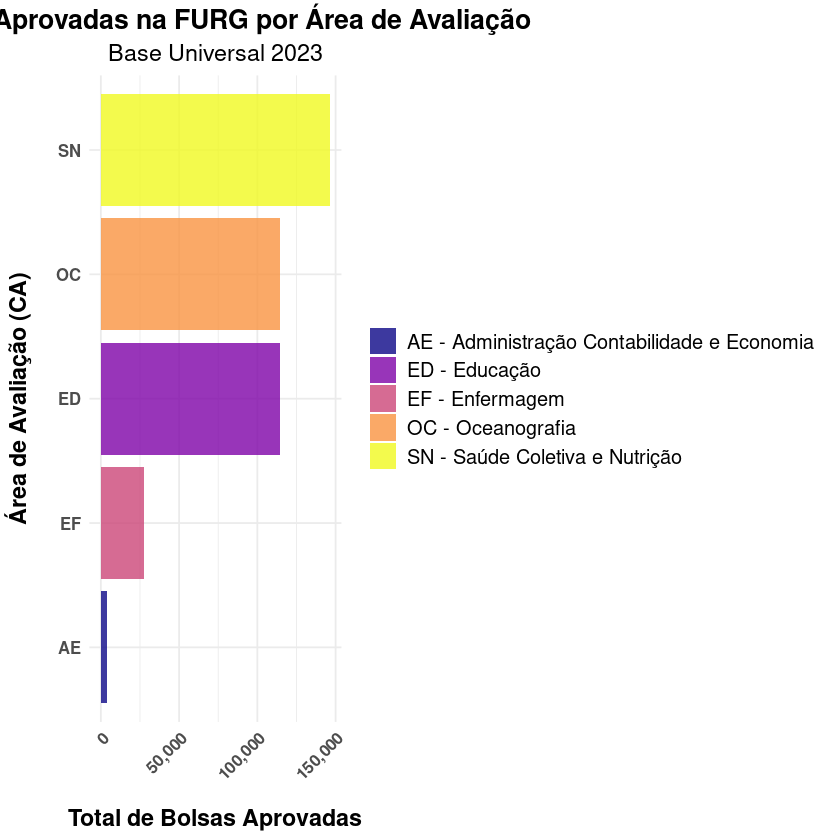

In [9]:
furg_data <- data %>%
  filter(Instituição == "FURG") %>%
  filter(!is.na(Bolsas.Aprov) & Bolsas.Aprov > 0) 

furg_data <- furg_data %>%
  left_join(areas, by = c("CA" = "Código"))  

furg_data$CA_Area <- paste(furg_data$CA, "-", furg_data$Área)

p <- ggplot(furg_data, aes(x = reorder(CA, Bolsas.Aprov, sum), y = Bolsas.Aprov, fill = CA_Area)) +
  geom_bar(stat = "identity", show.legend = TRUE, alpha = 0.8) +
  scale_y_continuous(labels = scales::comma) +  
  scale_fill_viridis(option = "plasma", discrete = TRUE) +  
  coord_flip() +  
  theme_minimal() +
  labs(
    title = "Bolsas Aprovadas na FURG por Área de Avaliação",
    subtitle = "Base Universal 2023",
    x = "Área de Avaliação (CA)",
    y = "Total de Bolsas Aprovadas"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 14),
    axis.text.x = element_text(angle = 45, hjust = 1, face = "bold", size = 10),
    axis.text.y = element_text(, hjust = 1, face = "bold", size = 10),
    axis.title.x = element_text(size = 14, face = "bold", margin = margin(t = 15)),
    axis.title.y = element_text(size = 14, face = "bold", margin = margin(r = 15)),
    legend.title = element_blank(),  
    legend.text = element_text(size = 12) 
  )

ggsave("grafico_furg_Bolsas_Aprov.pdf", plot = p, width = 16, height = 8)

print(p)